In [1]:
%pip install --user pandas scipy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import bz2
import os

Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00000-00100.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00100-00200.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00200-00300.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00300-00400.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00400-00500.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00500-00600.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00600-00700.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00700-00800.trans.bz2
Reading file:  /mnt/data/exomol/exomol3_data/CH4/12C-1H4/YT10to10/12C-1H4__YT10to10__00800-00900.trans.bz2
Reading file:  /mnt/data/exomol/exomo

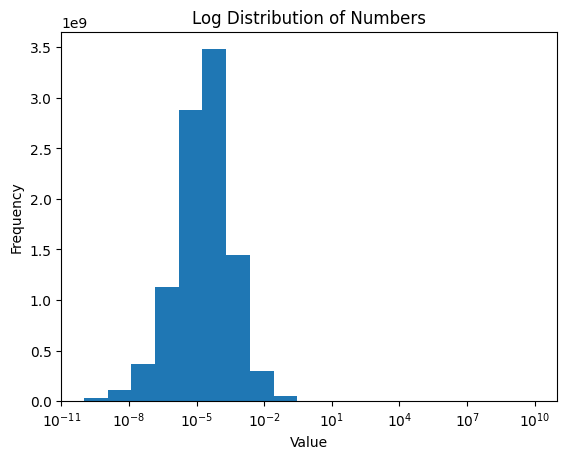

In [3]:
# Define a function to convert a string to a number
def convert_to_number(s):
    try:
        return float(s)
    except ValueError:
        return None

# Initialize a histogram
bins = np.logspace(-10, 10, 20)  # Adjust the range as needed
hist_data = np.zeros(len(bins) - 1)

# Retrieve a list of all .trans files, change if needed
filenames = glob.glob('/mnt/data/exomol/exomol3_data/TiO/49Ti-16O/Toto/*.trans.bz2')
filenames = sorted(filenames)

# ## For sample input
# # get current repository
# current_directory = os.getcwd()
# filenames = glob.glob(os.path.join(current_directory, '*.trans.bz2'))

# Initialize a list for the numbers
numbers = []

# Loop over the filenames
for filename in filenames:

    # Track the process of data reading
    print("Reading file: ", filename)
    
    # Open the file
    with bz2.open(filename, 'r') as file:
        # Loop over the lines in the file
        for line in file:
            # Decode the line to a string
            line = line.decode('utf-8')

            # Split the line on spaces (or appropriate delimiter)
            data = line.strip().split()

            # Convert the third column to a number and add it to the list
            number = convert_to_number(data[2])
            if number is not None:
                numbers.append(number)

    # Update the histogram with the numbers from this chunk
    hist, _ = np.histogram(numbers, bins=bins)
    hist_data += hist

# Plot the histogram
plt.bar(bins[:-1], hist_data, width=np.diff(bins), align="edge")
plt.xscale('log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Log Distribution of Numbers')
plt.show()